# Cement Strength Prediction

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\kurra\Desktop\iNeuron\Dataset\Concrete_Data.csv")
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.shape

(1030, 9)

In [4]:
df.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cement            1030 non-null   float64
 1   slag              1030 non-null   float64
 2   flyash            1030 non-null   float64
 3   water             1030 non-null   float64
 4   superplasticizer  1030 non-null   float64
 5   coarseaggregate   1030 non-null   float64
 6   fineaggregate     1030 non-null   float64
 7   age               1030 non-null   int64  
 8   csMPa             1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [6]:
# Looks no missing value
df.isna().sum()

cement              0
slag                0
flyash              0
water               0
superplasticizer    0
coarseaggregate     0
fineaggregate       0
age                 0
csMPa               0
dtype: int64

In [27]:
df.columns

Index(['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age', 'csMPa'],
      dtype='object')

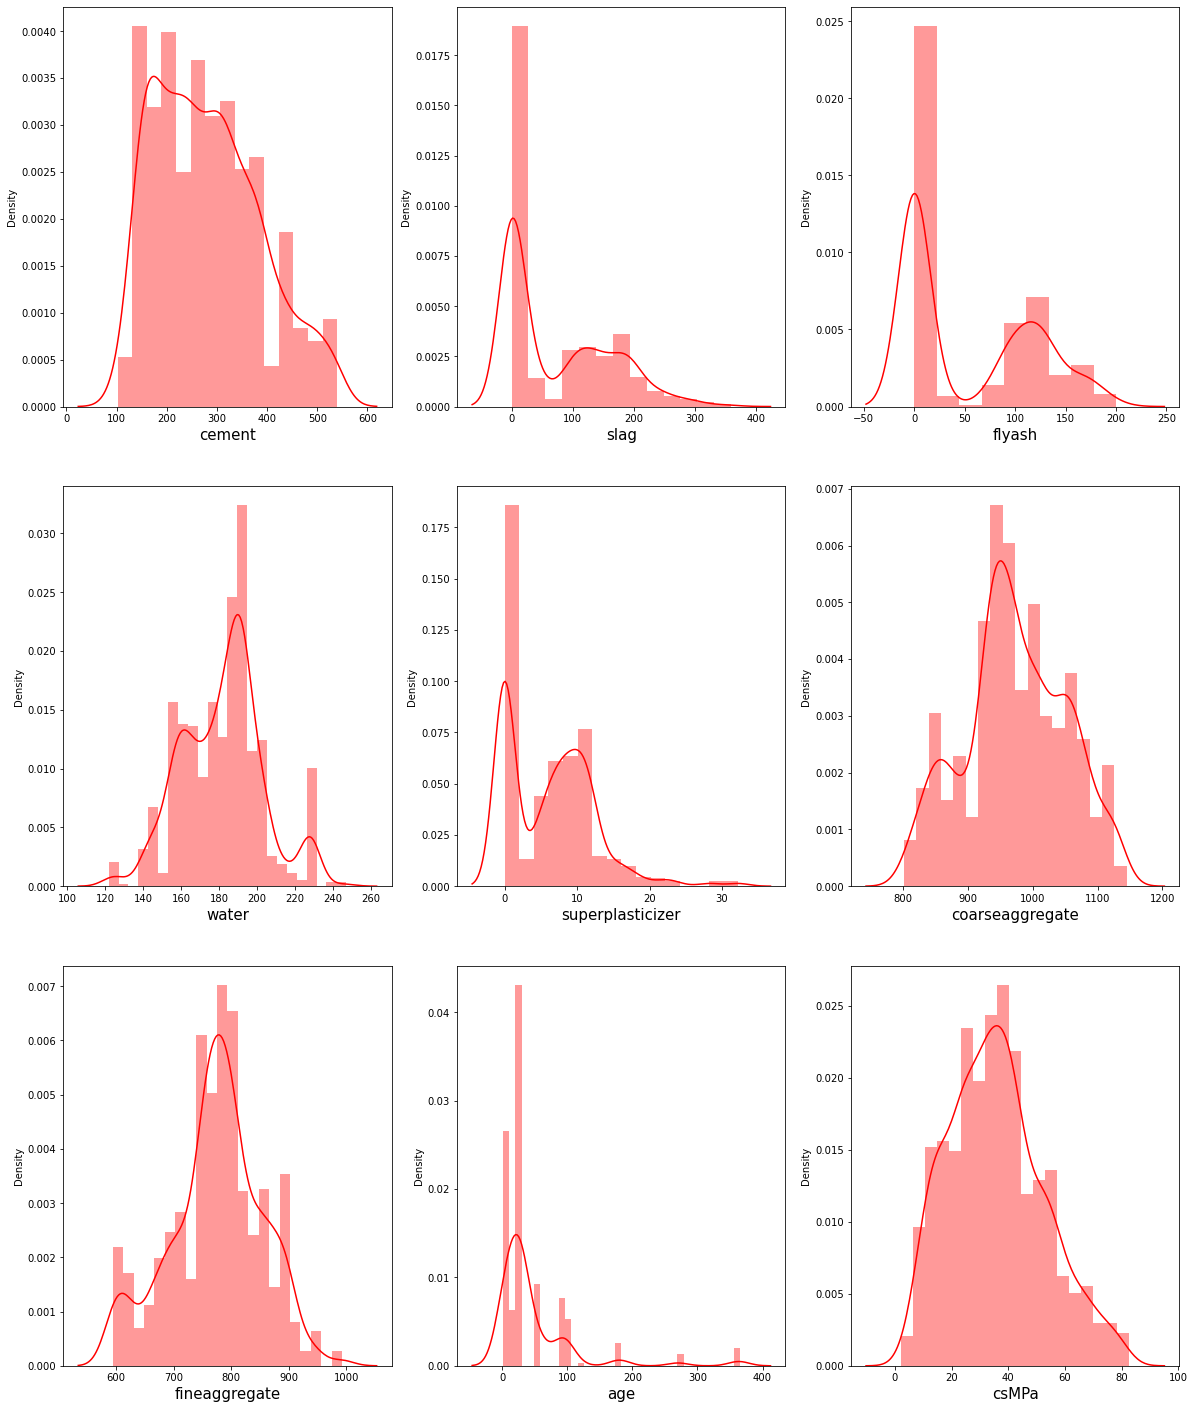

In [7]:
plt.figure(figsize = (20, 25))
pltnumber = 1

for col in df.columns:
    if pltnumber <= 9:
        ax = plt.subplot(3,3,pltnumber)
        sns.distplot(df[col], color ='red')
        plt.xlabel(col, fontsize = 15)
        
    pltnumber += 1
plt.show()

In [15]:
# Segregating dependent and independent column
x = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [16]:
x.head(2)

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28


In [17]:
y.head(2)

0    79.99
1    61.89
Name: csMPa, dtype: float64

In [ ]:
plt.figure(figsize=(20,25))
plotnumber = 1

for column in x1:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(y1,x1[column])
    plotnumber += 1
plt.show()

In [18]:
# Normalization of data
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)


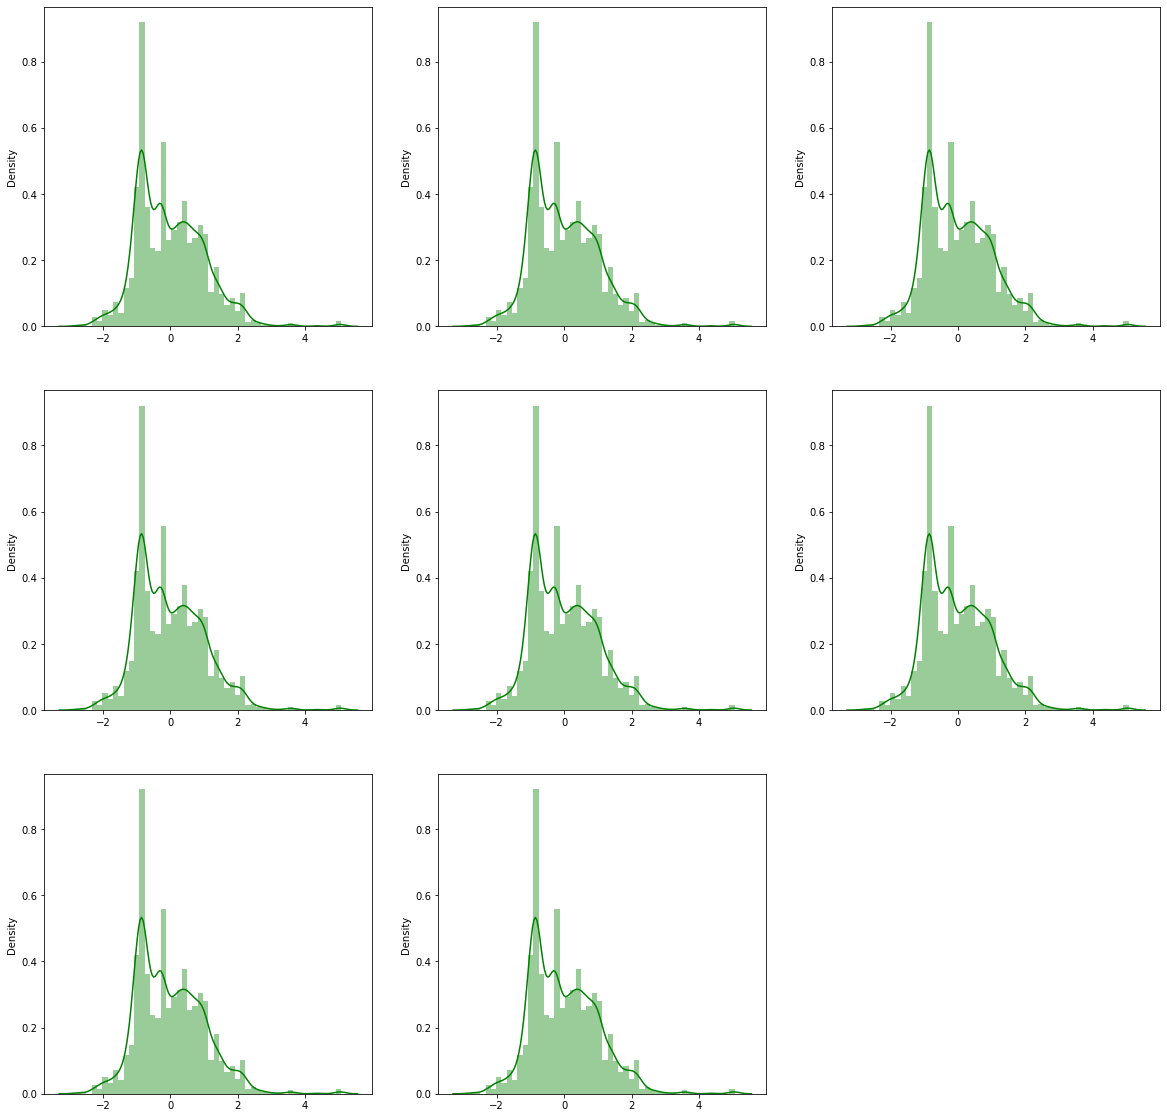

In [54]:
plt.figure(figsize = (20,20))
pltnum = 1
for col in x_scaled:
    if pltnum <= 8:
        ax = plt.subplot(3,3,pltnum)
        sns.distplot(x_scaled, color = 'green')
    pltnum += 1
    
plt.show()
    

<AxesSubplot:>

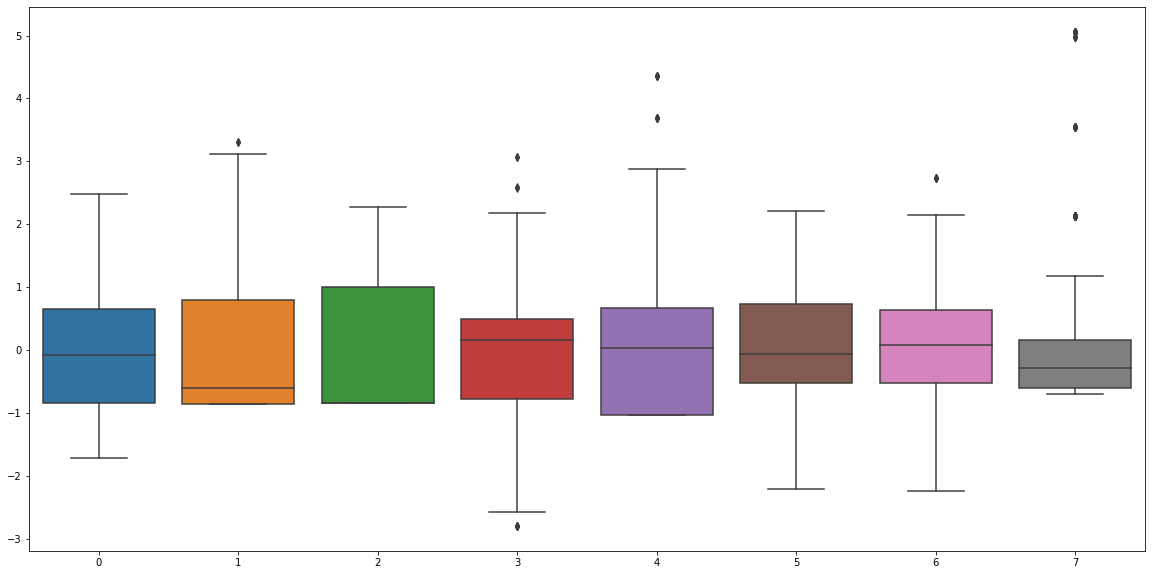

In [24]:
# Now data is normalized and look good. let's check for outlier
plt.figure(figsize = (20,10))
sns.boxplot(data=x_scaled)

In [28]:
#  drop() method with the index argument to remove the rows that meet the specified condition
x_scaled_df = pd.DataFrame(x_scaled, columns = ['cement', 'slag', 'flyash', 'water', 'superplasticizer',
       'coarseaggregate', 'fineaggregate', 'age'])
x_scaled_df

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
3,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,5.057677
4,-0.790459,0.678408,-0.847144,0.488793,-1.039143,0.070527,0.647884,4.978487
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


In [29]:
x_scaled_df.shape

(1030, 8)

In [37]:
x_scaled_df1 = x_scaled_df.drop(index=x_scaled_df[x_scaled_df['age'] >= 4].index)
x_scaled_df1

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age
0,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,0.863154,-1.217670,-0.279733
1,2.477915,-0.856888,-0.847144,-0.916764,-0.620448,1.056164,-1.217670,-0.279733
2,0.491425,0.795526,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,3.553066
5,-0.145209,0.465044,-0.847144,2.175461,-1.039143,-0.526517,-1.292542,0.702224
7,0.946164,0.244722,-0.847144,2.175461,-1.039143,-0.526517,-2.240917,-0.279733
...,...,...,...,...,...,...,...,...
1025,-0.045645,0.488235,0.564545,-0.092171,0.451410,-1.323005,-0.065893,-0.279733
1026,0.392819,-0.856888,0.960068,0.676200,0.702626,-1.994680,0.496893,-0.279733
1027,-1.270088,0.759579,0.850635,0.521589,-0.017528,-1.036064,0.080107,-0.279733
1028,-1.168610,1.308065,-0.847144,-0.279579,0.853356,0.214641,0.191166,-0.279733


<AxesSubplot:>

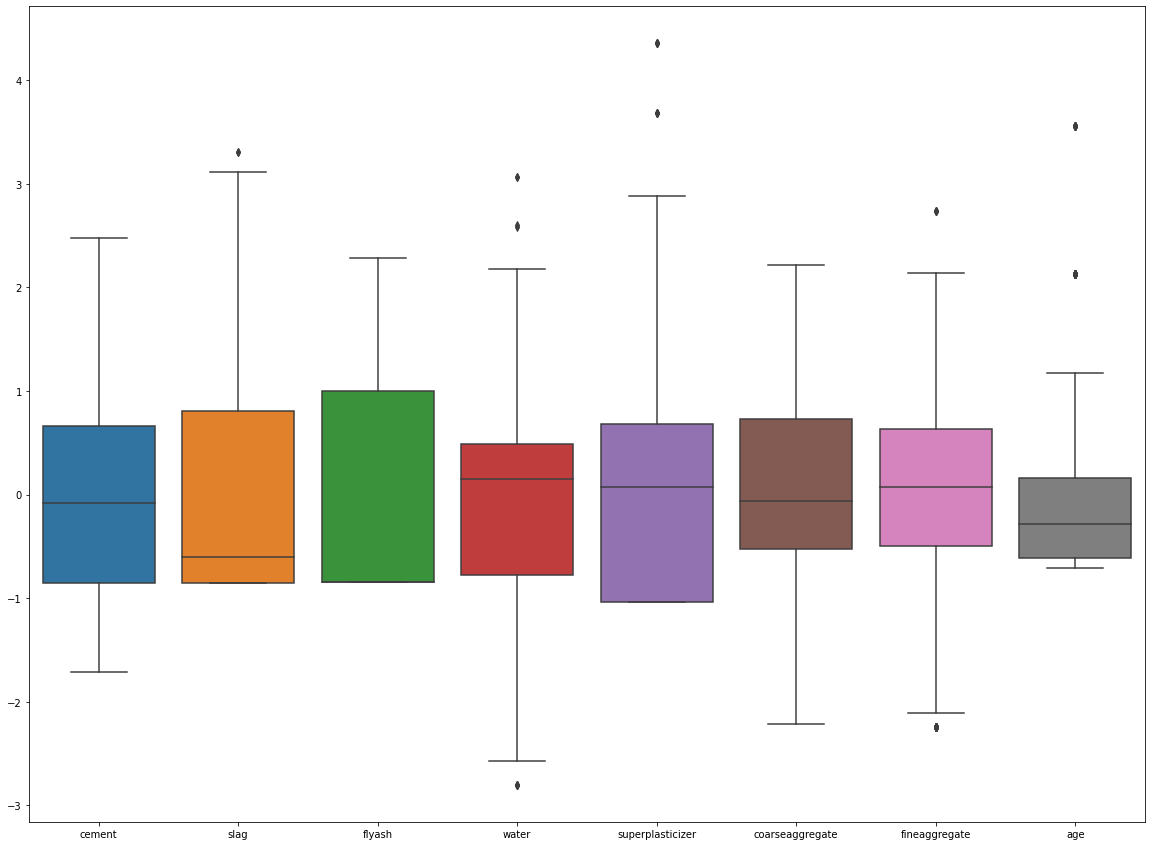

In [59]:
plt.figure(figsize = (20,15))
sns.boxplot(data=x_scaled_df1)

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

#let's check the values
vif

,vif,Features
0,7.488944,cement
1,7.276963,slag
2,6.170634,flyash
3,7.003957,water
4,2.963776,superplasticizer
5,5.074617,coarseaggregate
6,7.005081,fineaggregate
7,1.118367,age


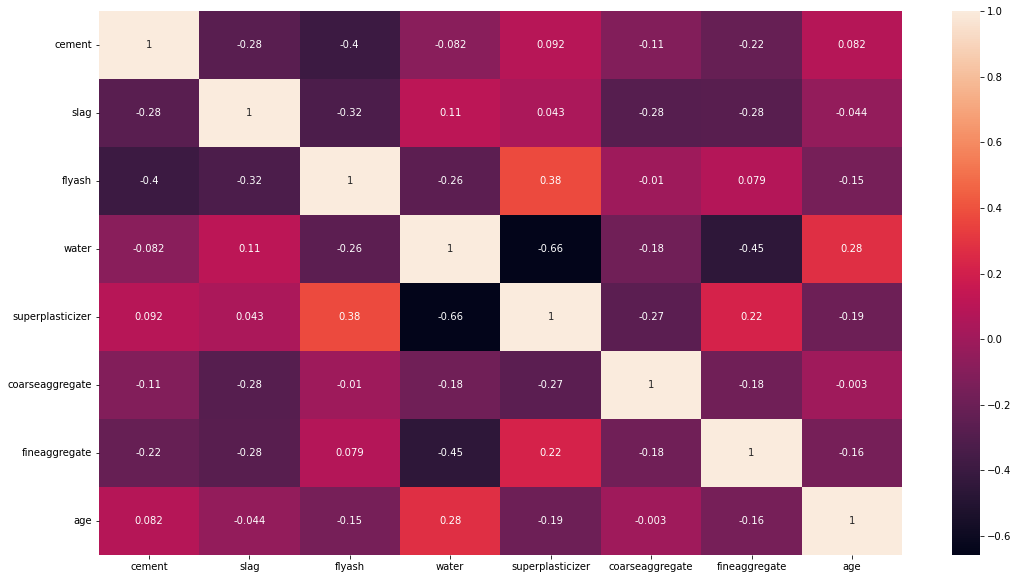

In [50]:
# Checking the correlation using Heatmap
plt.figure(figsize = (18, 10))

corr = x.corr()

sns.heatmap(data = corr, annot = True)
plt.show()

In [75]:
# Splitting the data into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(772, 8)
(258, 8)
(772,)
(258,)


In [78]:
# Model Building using Linear Regression
log_re = LinearRegression()
log_re.fit(x_train,y_train)
log_re.score(x_train,y_train)

0.594998180832873

In [77]:
log_re.score(x_test,y_test)

0.6591540610893639

In [79]:
# Model Building using Decision Tree
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)
dt_reg.score(x_test,y_test)

0.8945984632883331

In [80]:
# Model Building using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()

rf_reg.fit(x_train,y_train)
rf_reg.score(x_test,y_test)

0.9257377440812773

In [86]:
# Model Building using XGBoost

from xgboost import XGBRegressor
xgb_reg = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)

xgb_reg.fit(x_train,y_train)
xgb_reg.score(x_test,y_test)

0.9408322366389025

In [88]:
Model_Performance = pd.DataFrame({'Model':['Linear Regression','Decision Tree','Random Forest','XGBoost'],
                                  'Score':[log_re.score(x_test,y_test),dt_reg.score(x_test,y_test),rf_reg.score(x_test,y_test),
                                          xgb_reg.score(x_test,y_test)]})
Model_Performance

,Model,Score
0,Linear Regression,0.659154
1,Decision Tree,0.894598
2,Random Forest,0.925738
3,XGBoost,0.940832
